In [38]:
#import packages
import sklearn
import numpy as np
import pandas as pd

In [39]:
#get data into dataframes
combined_data = []
idx=0
for year in range(2011,2019):
    combined_data.append([])
    combined_data[idx] = pd.read_csv('answer'+str(year)+'.csv')

    for i in range(len(combined_data[idx]['Median Age'])):
        if(np.isnan(combined_data[idx]['Median Age'][i])):
            combined_data[idx] = combined_data[idx][:i]
            break
    idx+=1
print(combined_data[2])

       Unnamed: 0.1  Unnamed: 0  State Name county Name  Month        AQI  \
0                 0           0     Wyoming      Weston     12   1.000000   
1                 1           1     Alabama     Baldwin      1  28.636364   
2                 2           2     Alabama     Baldwin      2  27.444444   
3                 3           3     Alabama     Baldwin      3  48.419355   
4                 4           4     Alabama     Baldwin      4  37.680000   
...             ...         ...         ...         ...    ...        ...   
10379         11202       11202  Washington      Skagit      1  36.806452   
10380         11203       11203  Washington      Skagit      2  36.571429   
10381         11204       11204  Washington      Skagit      3  39.032258   
10382         11205       11205  Washington      Skagit      4  37.700000   
10383         11206       11206  Washington      Skagit      5  36.645161   

        fips         Land  Population   Poverty  Median_House_Income  \
0  

In [40]:
from tqdm import tqdm

In [79]:
#make a single dataframe with aggregate, county wise

fips_dict = {}
for year in tqdm(range(len(combined_data))):
    for fips in combined_data[year]['fips']:
        if fips not in fips_dict:
            fips_dict[fips] = 1

idx = 0            
final_df = []
for key in tqdm(fips_dict):
    
    final_df.append([])
    final_df[idx] = pd.DataFrame(columns = combined_data[0].columns)
        
    for year in range(len(combined_data)):
        for i in range(len(combined_data[year].index)):
            if combined_data[year].iloc[i]['fips'] == key:
                while(combined_data[year].iloc[i]['fips'] == key):
                    final_df[idx] = pd.concat([final_df[idx],(combined_data[year].iloc[i].to_frame().T)])
                    i+=1
                    if(i>=len(combined_data[year].index)):
                        break
                break
                
    idx+=1
    

100%|███████████████████████████████████████████████████████████████████████████████████| 1014/1014 [1:48:49<00:00,  6.44s/it]


In [25]:
#make a single dataframe with aggregate, State wise

state_dict = {}
for year in range(len(combined_data)):
    for state in combined_data[year]['State Name']:
        if state not in state_dict:
            state_dict[state] = 1

idx = 0            
state_final_df = []
for key in tqdm(state_dict):
    
    state_final_df.append([])
    state_final_df[idx] = pd.DataFrame(columns = combined_data[0].columns)
        
    for year in range(len(combined_data)):
        for i in range(len(combined_data[year].index)):
            if combined_data[year].iloc[i]['State Name'] == key:
                state_final_df[idx] = pd.concat([state_final_df[idx],(combined_data[year].iloc[i].to_frame().T)])
            
    idx+=1

100%|█████████████████████████████████████████████████████████████████████████████████████████| 48/48 [08:15<00:00, 10.33s/it]


In [30]:
#make a single dataframe with aggregate, for USA

USA_final_df = []
USA_final_df.append([])
USA_final_df = pd.DataFrame(columns = combined_data[0].columns)
for year in tqdm(range(len(combined_data))):
    for i in range(len(combined_data[year].index)):
            USA_final_df = pd.concat([USA_final_df,(combined_data[year].iloc[i].to_frame().T)])


100%|██████████████████████████████████████████████████████████████████████████████████████████| 8/8 [16:15<00:00, 121.98s/it]


In [33]:
#multiple regression for variables until 2018, for USA
features = ['Land','Population','Poverty','Median_House_Income','Median Age','Popiulation Density']
label = ['AQI']
X = USA_final_df[features]
Y = USA_final_df[label]

import statsmodels.api as sm
from scipy import stats
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y.astype(float), X_new.astype(float))
stats = regcorr.fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     342.9
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        00:13:22   Log-Likelihood:            -3.5126e+05
No. Observations:               84086   AIC:                         7.025e+05
Df Residuals:                   84079   BIC:                         7.026e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.1694    

In [294]:
#multiple regression for variables until 2018, for each State
features = ['Land','Population','Poverty','Median_House_Income','Median Age','Popiulation Density']
label = ['AQI']
print(state_final_df[30].iloc[0]['State Name'])
X = state_final_df[30][features]
Y = state_final_df[30][label]

import statsmodels.api as sm
from scipy import stats
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y.astype(float), X_new.astype(float))
stats = regcorr.fit()
print(stats.summary())

New York
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.258
Date:                Wed, 04 May 2022   Prob (F-statistic):           4.52e-10
Time:                        17:40:00   Log-Likelihood:                -10797.
No. Observations:                2890   AIC:                         2.161e+04
Df Residuals:                    2883   BIC:                         2.165e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  33

In [280]:
#multiple regression for variables until 2018, for each county
features = ['Land','Population','Poverty','Median_House_Income','Median Age','Popiulation Density']
label = ['AQI']
print(final_df[59].iloc[0]['State Name'])
print(final_df[59].iloc[0]['county Name'])

X = final_df[59][features]
Y = final_df[59][label]

import statsmodels.api as sm
from scipy import stats
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y.astype(float), X_new.astype(float))
stats = regcorr.fit()
print(stats.summary())

California
Fresno
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.778
Date:                Wed, 04 May 2022   Prob (F-statistic):              0.113
Time:                        17:36:08   Log-Likelihood:                -428.22
No. Observations:                  96   AIC:                             870.4
Df Residuals:                      89   BIC:                             888.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const           

In [109]:
combined_deaths_data = []
fips_deaths_dict = {}
fips_cases_dict = {}
for fips in fips_dict:
    fips_deaths_dict[fips] = 0
    fips_cases_dict[fips] = 0
death_data_yearly = pd.read_csv('us-counties-2020.csv')

combined_deaths_data = pd.DataFrame(columns = death_data_yearly.columns)

for year in tqdm(range(2020,2023)):
    death_data_yearly = pd.read_csv('us-counties-'+str(year)+'.csv')
    idx = 0
    for i in tqdm(range(len(death_data_yearly['fips']))):
        if death_data_yearly.iloc[i]['fips'] in fips_dict:
            fips_deaths_dict[death_data_yearly.iloc[i]['fips']] += (death_data_yearly.iloc[i]['deaths']-fips_deaths_dict[death_data_yearly.iloc[i]['fips']])
            idx+=1


  6%|████▊                                                                           | 53157/884737 [00:13<02:57, 4679.74it/s]


 13%|██████████▍                                                                    | 117535/884737 [00:26<02:45, 4644.44it/s]


 21%|████████████████▋                                                              | 186437/884737 [00:40<02:12, 5283.80it/s]


 28%|██████████████████████▍                                                        | 250647/884737 [00:53<02:08, 4929.78it/s]


 36%|████████████████████████████▎                                                  | 316599/884737 [01:07<01:43, 5499.43it/s]


 43%|██████████████████████████████████                                             | 382059/884737 [01:20<01:56, 4316.42it/s]


 50%|███████████████████████████████████████▌                                       | 442879/884737 [01:34<01:34, 4666.54it/s]


 57%|█████████████████████████████████████████████▏                                 | 506417/884737 [01:48<01:08, 5538.48it/s]


 66%|███████████████████████████████████████████████████▊                           | 579856/884737 [02:01<00:52, 5826.12it/s]


 74%|██████████████████████████████████████████████████████████▎                    | 653404/884737 [02:15<00:43, 5268.44it/s]


 82%|████████████████████████████████████████████████████████████████▉              | 726903/884737 [02:28<00:29, 5303.68it/s]


 90%|███████████████████████████████████████████████████████████████████████▍       | 799606/884737 [02:41<00:15, 5379.69it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 872566/884737 [02:55<00:02, 5221.36it/s]


  5%|███▉                                                                           | 59671/1185373 [00:11<03:31, 5310.39it/s]


 11%|████████▋                                                                     | 132429/1185373 [00:24<03:17, 5341.31it/s]


 17%|█████████████▎                                                                | 201847/1185373 [00:38<03:22, 4852.65it/s]


 23%|██████████████████                                                            | 274546/1185373 [00:51<02:45, 5511.39it/s]


 29%|██████████████████████▉                                                       | 348564/1185373 [01:04<02:31, 5531.63it/s]


 35%|███████████████████████████▍                                                  | 416944/1185373 [01:18<02:26, 5254.44it/s]


 41%|████████████████████████████████▏                                             | 488571/1185373 [01:31<01:59, 5815.88it/s]


 47%|████████████████████████████████████▉                                         | 560464/1185373 [01:45<01:55, 5415.03it/s]


 53%|█████████████████████████████████████████▎                                    | 627759/1185373 [01:58<01:46, 5233.34it/s]


 59%|██████████████████████████████████████████████                                | 700662/1185373 [02:12<01:28, 5464.66it/s]


 65%|██████████████████████████████████████████████████▊                           | 773133/1185373 [02:25<01:15, 5480.94it/s]


 71%|███████████████████████████████████████████████████████▌                      | 844338/1185373 [02:39<01:18, 4368.30it/s]


 77%|███████████████████████████████████████████████████████████▊                  | 909627/1185373 [02:52<00:51, 5343.22it/s]


 82%|████████████████████████████████████████████████████████████████▎             | 977300/1185373 [03:06<00:36, 5690.17it/s]


 88%|███████████████████████████████████████████████████████████████████▉         | 1045861/1185373 [03:19<00:31, 4470.32it/s]


 93%|███████████████████████████████████████████████████████████████████████▉     | 1107825/1185373 [03:33<00:21, 3582.86it/s]


 99%|████████████████████████████████████████████████████████████████████████████ | 1171229/1185373 [03:47<00:03, 3949.71it/s]


 15%|████████████                                                                    | 49724/328512 [00:10<00:52, 5275.01it/s]


 35%|███████████████████████████▎                                                   | 113719/328512 [00:23<00:38, 5526.16it/s]


 55%|███████████████████████████████████████████▌                                   | 181257/328512 [00:37<00:29, 5061.01it/s]


 77%|█████████████████████████████████████████████████████████████                  | 253815/328512 [00:50<00:16, 4600.91it/s]


 98%|█████████████████████████████████████████████████████████████████████████████  | 320479/328512 [01:04<00:01, 5377.02it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 3/3 [07:55<00:00, 158.64s/it]


In [111]:
print(fips_deaths_dict)


{56045: 18.0, 1003: 677.0, 1027: 81.0, 1033: 260.0, 1049: 326.0, 1051: 343.0, 1055: 641.0, 1069: 502.0, 1073: 2343.0, 1079: 155.0, 1089: 952.0, 1097: 1639.0, 1101: 932.0, 1103: 510.0, 1113: 89.0, 1117: 447.0, 1119: 51.0, 1121: 375.0, 1125: 769.0, 1127: 438.0, 4001: 605.0, 4003: 559.0, 4005: 472.0, 4007: 376.0, 4012: 141.0, 4013: 17004.0, 4015: 1430.0, 4017: 890.0, 4019: 3794.0, 4021: 1619.0, 4023: 227.0, 4025: 1192.0, 4027: 1167.0, 5001: 79.0, 5003: 65.0, 5019: 79.0, 5035: 226.0, 5045: 313.0, 5051: 508.0, 5067: 62.0, 5101: 47.0, 5107: 98.0, 5113: 148.0, 5115: 208.0, 5119: 1173.0, 5131: 520.0, 5139: 175.0, 5141: 62.0, 5143: 617.0, 5145: 289.0, 6001: 1858.0, 6003: 0.0, 6005: 86.0, 6007: 399.0, 6009: 120.0, 6011: 21.0, 6013: 1296.0, 6015: 50.0, 6017: 207.0, 6019: 2731.0, 6021: 67.0, 6023: 141.0, 6025: 909.0, 6027: 56.0, 6029: 2320.0, 6031: 443.0, 6033: 134.0, 6037: 31807.0, 6039: 354.0, 6041: 288.0, 6043: 34.0, 6045: 120.0, 6047: 815.0, 6051: 6.0, 6053: 734.0, 6055: 144.0, 6057: 123.0, 60

In [104]:
# fips_deaths_dict = {}
# for fips in fips_dict:
#     fips_deaths_dict[fips] = 0
# idx = 0
# for fips in tqdm(combined_deaths_data['fips']):
#     fips_deaths_dict[fips] += combined_deaths_data.iloc[idx]['deaths']
#     idx+=1

In [112]:
fips_aqi_average = {}
fips_aqi_average_count = {}
for fips in fips_dict:
    fips_aqi_average[fips] = 0
    fips_aqi_average_count[fips] = 0
idx = 0
for fips in tqdm(fips_dict):
    for rows in range(len(final_df[idx]['Month'])):
        fips_aqi_average[fips] += final_df[idx].iloc[rows]['AQI']
        fips_aqi_average_count[fips]+=1
    idx+=1
    fips_aqi_average[fips] =  fips_aqi_average[fips]/fips_aqi_average_count[fips]


    

100%|████████████████████████████████████████████████████████████████████████████████████| 1014/1014 [00:04<00:00, 226.05it/s]


In [113]:
aqi_vs_deaths_fips = pd.DataFrame( columns = ['fips','deaths', 'average_aqi'])

for fips in fips_dict:
    aqi_vs_deaths_fips.loc[len(aqi_vs_deaths_fips.index)] = [fips, fips_deaths_dict[fips], fips_aqi_average[fips]] 



In [114]:
# regression for aqi vs deaths
features = ['average_aqi']
label = ['deaths']
X = aqi_vs_deaths_fips[features]
Y = aqi_vs_deaths_fips[label]
import statsmodels.api as sm
from scipy import stats
X_new = sm.add_constant(X)
regcorr = sm.OLS(Y.astype(float), X_new.astype(float))
stats = regcorr.fit()
print(stats.summary())
                            

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     151.2
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.77e-32
Time:                        12:32:06   Log-Likelihood:                -8843.5
No. Observations:                1014   AIC:                         1.769e+04
Df Residuals:                    1012   BIC:                         1.770e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1141.3039    155.487     -7.340      

In [115]:
import numpy as np
import matplotlib.pyplot as plt

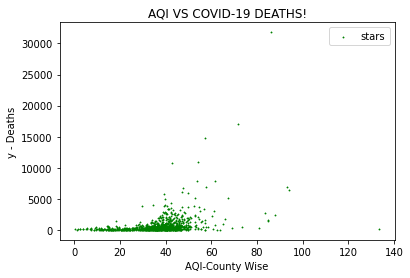

In [120]:
aqi_vs_deaths_fips.sort_values(by=['average_aqi'])

x = aqi_vs_deaths_fips['average_aqi']
y = aqi_vs_deaths_fips['deaths']
 
# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "green",
            marker= "*", s=1)
 
# x-axis label
plt.xlabel('AQI-County Wise')
# frequency label
plt.ylabel('y - Deaths')
# plot title
plt.title('AQI VS COVID-19 DEATHS!')
# showing legend
plt.legend()

 
# function to show the plot
plt.show()

In [183]:
air_pollution_data = []
temp_data = pd.read_csv('daily_aqi_by_county_' + str(2011) + '.csv')

idx = 0
for year in tqdm(range(2011,2022)):
    air_pollution_data.append([])
    air_pollution_data[idx] = pd.DataFrame(columns = temp_data.columns)
    air_pollution_data[idx]["Year"] = pd.NaT
    yearly_air_pollution_data = pd.read_csv('daily_aqi_by_county_' + str(year) + '.csv')
    yearly_air_pollution_data["Year"] = [year for i in range(len(yearly_air_pollution_data))]
    air_pollution_data[idx] = air_pollution_data[idx].append(yearly_air_pollution_data)
    idx+=1
    
for idx in range(len(air_pollution_data)):
    air_pollution_data[idx] = air_pollution_data[idx][air_pollution_data[idx]['Defining Parameter']=="PM2.5"]
print(air_pollution_data)

  0%|                                                                                                  | 0/11 [00:00<?, ?it/s]/var/folders/np/wdmx0_1x31vgtkvtbyc7t9840000gn/T/ipykernel_44745/423389446.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  air_pollution_data[idx] = air_pollution_data[idx].append(yearly_air_pollution_data)
  9%|████████▏                                                                                 | 1/11 [00:00<00:04,  2.19it/s]/var/folders/np/wdmx0_1x31vgtkvtbyc7t9840000gn/T/ipykernel_44745/423389446.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  air_pollution_data[idx] = air_pollution_data[idx].append(yearly_air_pollution_data)
 18%|████████████████▎                                                                         | 2/11 [00:00<00:03,  2.25it/s]/var/folders/np/wdmx

[       State Name county Name State Code County Code        Date AQI  \
0         Alabama     Baldwin          1           3  2011-01-03  25   
1         Alabama     Baldwin          1           3  2011-01-06  42   
2         Alabama     Baldwin          1           3  2011-01-09  25   
3         Alabama     Baldwin          1           3  2011-01-12  25   
4         Alabama     Baldwin          1           3  2011-01-15  59   
...           ...         ...        ...         ...         ...  ..   
329960    Wyoming       Teton         56          39  2011-09-12  46   
329972    Wyoming       Teton         56          39  2011-09-24  43   
330053    Wyoming       Teton         56          39  2011-12-14  51   
330056    Wyoming       Teton         56          39  2011-12-17  49   
330059    Wyoming       Teton         56          39  2011-12-20  39   

        Category Defining Parameter Defining Site Number of Sites Reporting  \
0           Good              PM2.5   01-003-0010      

In [143]:
idx = 0
for year in range(2011,2022):
    air_pollution_data[idx].drop(['State Code', 'County Code','Defining Site','Number of Sites Reporting','Category'], axis=1)


In [144]:
print(air_pollution_data)

[       State Name county Name State Code County Code        Date AQI  \
0         Alabama     Baldwin          1           3  2011-01-03  25   
1         Alabama     Baldwin          1           3  2011-01-06  42   
2         Alabama     Baldwin          1           3  2011-01-09  25   
3         Alabama     Baldwin          1           3  2011-01-12  25   
4         Alabama     Baldwin          1           3  2011-01-15  59   
...           ...         ...        ...         ...         ...  ..   
329960    Wyoming       Teton         56          39  2011-09-12  46   
329972    Wyoming       Teton         56          39  2011-09-24  43   
330053    Wyoming       Teton         56          39  2011-12-14  51   
330056    Wyoming       Teton         56          39  2011-12-17  49   
330059    Wyoming       Teton         56          39  2011-12-20  39   

        Category Defining Parameter Defining Site Number of Sites Reporting  \
0           Good              PM2.5   01-003-0010      

In [169]:
fips_dict = {}
state_name_fips_dict = {}
county_name_fips_dict = {}
for year in tqdm(range(len(combined_data))):
    for i in range(len(combined_data[year]['fips'])):
        if combined_data[year].iloc[i]['fips'] not in fips_dict:
            fips_dict[combined_data[year].iloc[i]['fips']] = 1
            county_name_fips_dict[combined_data[year].iloc[i]['State Name']+combined_data[year].iloc[i]['county Name']] = combined_data[year].iloc[i]['fips']
            state_name_fips_dict[combined_data[year].iloc[i]['county Name']] = combined_data[year].iloc[i]['fips']

100%|███████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.01it/s]


In [173]:
idx = 0
for year in tqdm(range(2011,2022)):
    air_pollution_data[idx]['fips'] = pd.NaT
    for i in tqdm(range(len(air_pollution_data[idx]))):
        if air_pollution_data[idx].iloc[i]['State Name']+air_pollution_data[idx].iloc[i]['county Name'] in county_name_fips_dict:
            air_pollution_data[idx].iloc[i]['fips'] = county_name_fips_dict[air_pollution_data[idx].iloc[i]['State Name']+air_pollution_data[idx].iloc[i]['county Name']]

                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    

  0%|                                                                                              | 0/118435 [00:00<?, ?it/s]/var/folders/np/wdmx0_1x31vgtkvtbyc7t9840000gn/T/ipykernel_44745/3812610653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_pollution_data[idx].iloc[i]['fips'] = county_name_fips_dict[air_pollution_data[idx].iloc[i]['State Name']+air_pollution_data[idx].iloc[i]['county Name']]

  1%|█                                                                                 | 1462/118435 [00:12<15:52, 122.78it/s]


  4%|███▌                                                                              | 5205/118435 [00:31<16:48, 112.29it/s]


  6%|████▋                                                                             | 6860/118435 [00:45<15:05, 123.28it/s]


  7%|██████                                                                            | 8729/118435 [00:59<12:04, 151.43it/s]


  9%|███████                                                                          | 10392/118435 [01:12<16:12, 111.10it/s]


 10%|████████▏                                                                        | 12050/118435 [01:26<14:53, 119.01it/s]


 12%|█████████▋                                                                       | 14247/118435 [01:42<15:55, 109.09it/s]


 14%|███████████                                                                      | 16099/118435 [01:55<11:11, 152.33it/s]


 15%|████████████▎                                                                    | 18030/118435 [02:09<13:46, 121.42it/s]


 17%|█████████████▌                                                                   | 19878/118435 [02:22<10:27, 157.13it/s]


 19%|███████████████                                                                  | 22010/118435 [02:35<09:58, 161.19it/s]


 20%|████████████████▌                                                                | 24132/118435 [02:49<10:04, 156.06it/s]


 22%|█████████████████▉                                                               | 26242/118435 [03:02<09:44, 157.72it/s]


 24%|███████████████████▋                                                             | 28699/118435 [03:17<07:55, 188.59it/s]


 26%|█████████████████████                                                            | 30707/118435 [03:31<09:33, 152.89it/s]


 27%|██████████████████████                                                           | 32298/118435 [03:46<13:51, 103.56it/s]


 29%|███████████████████████▏                                                         | 33879/118435 [04:00<12:48, 110.06it/s]


 30%|████████████████████████▍                                                        | 35726/118435 [04:13<08:48, 156.50it/s]


 32%|█████████████████████████▊                                                       | 37675/118435 [04:27<12:16, 109.72it/s]


 33%|██████████████████████████▉                                                      | 39410/118435 [04:41<12:24, 106.08it/s]


 38%|██████████████████████████████▉                                                  | 45271/118435 [05:01<09:29, 128.39it/s]


 40%|████████████████████████████████                                                 | 46860/118435 [05:16<09:37, 123.89it/s]


 41%|█████████████████████████████████▍                                               | 48812/118435 [05:29<07:42, 150.62it/s]


 43%|██████████████████████████████████▋                                              | 50785/118435 [05:44<09:16, 121.55it/s]


 44%|███████████████████████████████████▉                                             | 52601/118435 [05:58<07:06, 154.48it/s]


 46%|█████████████████████████████████████▎                                           | 54585/118435 [06:12<06:54, 154.00it/s]


 48%|███████████████████████████████████████▎                                         | 57395/118435 [06:29<06:10, 164.93it/s]


 50%|████████████████████████████████████████▋                                        | 59506/118435 [06:42<08:06, 121.07it/s]


 52%|██████████████████████████████████████████▏                                      | 61636/118435 [06:56<05:40, 166.65it/s]


 54%|███████████████████████████████████████████▌                                     | 63653/118435 [07:10<09:04, 100.69it/s]


 55%|████████████████████████████████████████████▊                                    | 65458/118435 [07:25<08:46, 100.59it/s]


 57%|██████████████████████████████████████████████▏                                  | 67544/118435 [07:38<05:15, 161.37it/s]


 59%|███████████████████████████████████████████████▋                                 | 69654/118435 [07:52<04:55, 164.98it/s]


 61%|█████████████████████████████████████████████████                                | 71744/118435 [08:06<05:48, 133.89it/s]


 62%|██████████████████████████████████████████████████▍                              | 73698/118435 [08:20<05:01, 148.21it/s]


 64%|███████████████████████████████████████████████████▋                             | 75600/118435 [08:34<06:53, 103.49it/s]


 65%|████████████████████████████████████████████████████▉                            | 77461/118435 [08:48<06:07, 111.50it/s]


 67%|██████████████████████████████████████████████████████▎                          | 79350/118435 [09:03<05:04, 128.52it/s]


 69%|███████████████████████████████████████████████████████▋                         | 81445/118435 [09:17<04:13, 146.06it/s]


 70%|████████████████████████████████████████████████████████▉                        | 83316/118435 [09:31<04:20, 134.74it/s]


 72%|██████████████████████████████████████████████████████████▍                      | 85354/118435 [09:44<04:16, 128.77it/s]


 74%|███████████████████████████████████████████████████████████▋                     | 87248/118435 [09:58<03:29, 148.81it/s]


 75%|████████████████████████████████████████████████████████████▉                    | 89105/118435 [10:13<03:09, 155.09it/s]


 77%|██████████████████████████████████████████████████████████████▎                  | 91072/118435 [10:27<02:56, 154.90it/s]


 79%|████████████████████████████████████████████████████████████████                 | 93601/118435 [10:42<02:25, 170.65it/s]


 81%|█████████████████████████████████████████████████████████████████▍               | 95705/118435 [10:56<02:23, 158.87it/s]


 82%|██████████████████████████████████████████████████████████████████▊              | 97673/118435 [11:10<02:04, 167.36it/s]


 84%|████████████████████████████████████████████████████████████████████▏            | 99753/118435 [11:24<01:55, 161.09it/s]


 86%|████████████████████████████████████████████████████████████████████▋           | 101665/118435 [11:38<02:01, 138.46it/s]


 88%|██████████████████████████████████████████████████████████████████████▌         | 104388/118435 [11:54<01:30, 154.74it/s]


 91%|█████████████████████████████████████████████████████████████████████████▏      | 108365/118435 [12:13<00:57, 175.19it/s]


 93%|██████████████████████████████████████████████████████████████████████████▌     | 110370/118435 [12:27<01:06, 122.06it/s]


 95%|███████████████████████████████████████████████████████████████████████████▉    | 112412/118435 [12:41<00:41, 144.72it/s]


  1%|▋                                                                                 | 1049/118435 [00:07<14:02, 139.30it/s]


  5%|███▊                                                                              | 5542/118435 [00:26<15:07, 124.44it/s]


  6%|█████▏                                                                            | 7420/118435 [00:40<12:44, 145.26it/s]


  8%|██████▎                                                                           | 9191/118435 [00:55<15:15, 119.32it/s]


  9%|███████▍                                                                         | 10907/118435 [01:09<13:37, 131.55it/s]


 11%|████████▊                                                                        | 12828/118435 [01:23<10:25, 168.96it/s]


 13%|██████████▍                                                                      | 15322/118435 [01:39<10:22, 165.64it/s]


 15%|███████████▊                                                                     | 17298/118435 [01:53<16:43, 100.79it/s]


 16%|█████████████▏                                                                   | 19231/118435 [02:07<09:59, 165.42it/s]


 18%|██████████████▌                                                                  | 21290/118435 [02:20<10:23, 155.83it/s]


 20%|███████████████▉                                                                 | 23280/118435 [02:34<10:26, 151.84it/s]


 21%|█████████████████▎                                                               | 25304/118435 [02:48<10:09, 152.87it/s]


 23%|██████████████████▌                                                              | 27165/118435 [03:02<14:18, 106.26it/s]


 25%|████████████████████▏                                                            | 29435/118435 [03:18<11:22, 130.41it/s]


 26%|█████████████████████▎                                                           | 31168/118435 [03:32<10:22, 140.09it/s]


 28%|██████████████████████▋                                                          | 33192/118435 [03:46<10:22, 136.89it/s]


 30%|███████████████████████▉                                                         | 34948/118435 [04:00<10:21, 134.23it/s]


  9%|███████▊                                                                              | 1/11 [16:51<2:48:31, 1011.20s/it]


KeyboardInterrupt: 

In [170]:
print(county_name_fips_dict)

{'WyomingWeston': 56045, 'AlabamaBaldwin': 1003, 'AlabamaClay': 1027, 'AlabamaColbert': 1033, 'AlabamaDeKalb': 1049, 'AlabamaElmore': 1051, 'AlabamaEtowah': 1055, 'AlabamaHouston': 1069, 'AlabamaJefferson': 1073, 'AlabamaLawrence': 1079, 'AlabamaMadison': 1089, 'AlabamaMobile': 1097, 'AlabamaMontgomery': 1101, 'AlabamaMorgan': 1103, 'AlabamaRussell': 1113, 'AlabamaShelby': 1117, 'AlabamaSumter': 1119, 'AlabamaTalladega': 1121, 'AlabamaTuscaloosa': 1125, 'AlabamaWalker': 1127, 'ArizonaApache': 4001, 'ArizonaCochise': 4003, 'ArizonaCoconino': 4005, 'ArizonaGila': 4007, 'ArizonaLa Paz': 4012, 'ArizonaMaricopa': 4013, 'ArizonaMohave': 4015, 'ArizonaNavajo': 4017, 'ArizonaPima': 4019, 'ArizonaPinal': 4021, 'ArizonaSanta Cruz': 4023, 'ArizonaYavapai': 4025, 'ArizonaYuma': 4027, 'ArkansasArkansas': 5001, 'ArkansasAshley': 5003, 'ArkansasClark': 5019, 'ArkansasCrittenden': 5035, 'ArkansasFaulkner': 5045, 'ArkansasGarland': 5051, 'ArkansasJackson': 5067, 'ArkansasNewton': 5101, 'ArkansasPhillip

In [214]:
# idx = 0
# for year in range(2011,2022):
#     air_pollution_data[idx]=air_pollution_data[idx].drop(['State Code', 'County Code','Defining Site','Number of Sites Reporting','Category','State Name' , 'county Name'], axis=1)
#     idx+=1

idx = 0
for year in range(2011,2022):
    air_pollution_data[idx]=air_pollution_data[idx].drop(['count1'], axis=1)
    idx+=1


# idx=0
# for year in range(2011,2022):
#     air_pollution_data[idx]['count1'] = [1 for i in range(len( air_pollution_data[idx]))]
#     idx+=1
    
print(air_pollution_data)

[                  Date AQI Defining Parameter  Year
Date                                               
2011-01-03  2011-01-03  25              PM2.5  2011
2011-01-06  2011-01-06  42              PM2.5  2011
2011-01-09  2011-01-09  25              PM2.5  2011
2011-01-12  2011-01-12  25              PM2.5  2011
2011-01-15  2011-01-15  59              PM2.5  2011
...                ...  ..                ...   ...
2011-09-12  2011-09-12  46              PM2.5  2011
2011-09-24  2011-09-24  43              PM2.5  2011
2011-12-14  2011-12-14  51              PM2.5  2011
2011-12-17  2011-12-17  49              PM2.5  2011
2011-12-20  2011-12-20  39              PM2.5  2011

[118435 rows x 4 columns],                   Date  AQI Defining Parameter  Year
Date                                                
2012-01-01  2012-01-01   28              PM2.5  2012
2012-01-04  2012-01-04   38              PM2.5  2012
2012-01-07  2012-01-07   27              PM2.5  2012
2012-01-10  2012-01-10   29   

In [215]:
idx = 0
monthly_air_pollution = []
for year in tqdm(range(2011,2022)):
    monthly_air_pollution.append([])
    air_pollution_data[idx].index = pd.to_datetime(air_pollution_data[idx]['Date'],format='%Y-%m-%d')
    monthly_air_pollution[idx]= air_pollution_data[idx].groupby(by=[air_pollution_data[idx].index.month]).sum()
    print(monthly_air_pollution[idx])
    idx+=1


  9%|████████▏                                                                                 | 1/11 [00:00<00:03,  2.79it/s]

                                                   Date     AQI  \
Date                                                              
1     2011-01-032011-01-062011-01-092011-01-122011-0...  646757   
2     2011-02-022011-02-052011-02-082011-02-112011-0...  476876   
3     2011-03-042011-03-072011-03-192011-03-222011-0...  422528   
4     2011-04-092011-04-152011-04-212011-04-272011-0...  313388   
5     2011-05-092011-05-122011-05-212011-05-242011-0...  340446   
6     2011-06-022011-06-082011-06-172011-06-202011-0...  343257   
7     2011-07-022011-07-052011-07-172011-07-262011-0...  396484   
8     2011-08-012011-08-072011-08-102011-08-252011-0...  352854   
9     2011-09-152011-09-182011-09-212011-09-242011-0...  330479   
10    2011-10-122011-10-032011-10-062011-10-092011-1...  374518   
11    2011-11-022011-11-052011-11-082011-11-112011-1...  473557   
12    2011-12-022011-12-052011-12-082011-12-112011-1...  624794   

                                     Defining Parameter      

 18%|████████████████▎                                                                         | 2/11 [00:00<00:03,  2.96it/s]

                                                   Date     AQI  \
Date                                                              
1     2012-01-012012-01-042012-01-072012-01-102012-0...  543502   
2     2012-02-032012-02-062012-02-092012-02-122012-0...  484600   
3     2012-03-012012-03-072012-03-102012-03-132012-0...  407165   
4     2012-04-152012-04-212012-04-302012-04-032012-0...  252439   
5     2012-05-242012-05-032012-05-062012-05-092012-0...  271727   
6     2012-06-112012-06-142012-06-202012-06-232012-0...  230181   
7     2012-07-022012-07-082012-07-112012-07-232012-0...  341118   
8     2012-08-012012-08-042012-08-102012-08-132012-0...  318272   
9     2012-09-032012-09-122012-09-212012-09-242012-0...  344046   
10    2012-10-032012-10-122012-10-212012-10-272012-1...  371968   
11    2012-11-022012-11-052012-11-082012-11-112012-1...  589179   
12    2012-12-022012-12-052012-12-082012-12-112012-1...  544961   

                                     Defining Parameter      

 27%|████████████████████████▌                                                                 | 3/11 [00:01<00:02,  2.97it/s]

                                                   Date     AQI  \
Date                                                              
1     2013-01-012013-01-042013-01-072013-01-102013-0...  631140   
2     2013-02-032013-02-062013-02-092013-02-122013-0...  447227   
3     2013-03-022013-03-082013-03-292013-03-022013-0...  377287   
4     2013-04-042013-04-042013-04-072013-04-102013-0...  232677   
5     2013-05-192013-05-252013-05-282013-05-312013-0...  259809   
6     2013-06-032013-06-122013-06-152013-06-212013-0...  321543   
7     2013-07-032013-07-152013-07-272013-07-302013-0...  399551   
8     2013-08-022013-08-052013-08-082013-08-172013-0...  426768   
9     2013-09-012013-09-072013-09-102013-09-132013-0...  305588   
10    2013-10-132013-10-192013-10-222013-10-252013-1...  413749   
11    2013-11-032013-11-062013-11-092013-11-122013-1...  474985   
12    2013-12-032013-12-062013-12-092013-12-122013-1...  658013   

                                     Defining Parameter      

 36%|████████████████████████████████▋                                                         | 4/11 [00:01<00:02,  2.95it/s]

                                                   Date     AQI  \
Date                                                              
1     2014-01-022014-01-052014-01-082014-01-112014-0...  540811   
2     2014-02-012014-02-042014-02-072014-02-102014-0...  523940   
3     2014-03-092014-03-242014-03-302014-03-032014-0...  437797   
4     2014-04-052014-04-232014-04-262014-04-022014-0...  243411   
5     2014-05-112014-05-262014-05-022014-05-052014-0...  249117   
6     2014-06-162014-06-192014-06-222014-06-252014-0...  313919   
7     2014-07-012014-07-042014-07-102014-07-162014-0...  413553   
8     2014-08-032014-08-062014-08-092014-08-122014-0...  433586   
9     2014-09-022014-09-052014-09-082014-09-112014-0...  315037   
10    2014-10-022014-10-052014-10-082014-10-112014-1...  308519   
11    2014-11-012014-11-042014-11-072014-11-102014-1...  493443   
12    2014-12-072014-12-102014-12-132014-12-162014-1...  571339   

                                     Defining Parameter      

 45%|████████████████████████████████████████▉                                                 | 5/11 [00:01<00:02,  2.90it/s]

                                                   Date     AQI  \
Date                                                              
1     2015-01-032015-01-062015-01-092015-01-122015-0...  615747   
2     2015-02-022015-02-052015-02-082015-02-112015-0...  519764   
3     2015-03-012015-03-042015-03-222015-03-012015-0...  418472   
4     2015-04-062015-04-122015-04-152015-04-182015-0...  222147   
5     2015-05-122015-05-152015-05-182015-05-242015-0...  264411   
6     2015-06-142015-06-172015-06-202015-06-232015-0...  332103   
7     2015-07-022015-07-052015-07-082015-07-112015-0...  478344   
8     2015-08-042015-08-072015-08-102015-08-132015-0...  416862   
9     2015-09-062015-09-212015-09-272015-09-302015-0...  290796   
10    2015-10-032015-10-272015-10-302015-10-062015-1...  318959   
11    2015-11-022015-11-052015-11-112015-11-142015-1...  436071   
12    2015-12-022015-12-052015-12-082015-12-112015-1...  502607   

                                     Defining Parameter      

 55%|█████████████████████████████████████████████████                                         | 6/11 [00:02<00:01,  2.95it/s]

                                                   Date     AQI  \
Date                                                              
1     2016-01-012016-01-042016-01-072016-01-102016-0...  539862   
2     2016-02-032016-02-062016-02-092016-02-122016-0...  403633   
3     2016-03-012016-03-102016-03-162016-03-252016-0...  345786   
4     2016-04-032016-04-062016-04-092016-04-122016-0...  195643   
5     2016-05-032016-05-032016-05-062016-05-092016-0...  219481   
6     2016-06-142016-06-172016-06-022016-06-052016-0...  214038   
7     2016-07-052016-07-082016-07-112016-07-292016-0...  286750   
8     2016-08-162016-08-282016-08-012016-08-042016-0...  273162   
9     2016-09-212016-09-242016-09-032016-09-062016-0...  246994   
10    2016-10-062016-10-152016-10-242016-10-032016-1...  314310   
11    2016-11-022016-11-052016-11-082016-11-112016-1...  526184   
12    2016-12-022016-12-052016-12-082016-12-112016-1...  539777   

                                     Defining Parameter      

 64%|█████████████████████████████████████████████████████████▎                                | 7/11 [00:02<00:01,  2.91it/s]

                                                   Date     AQI  \
Date                                                              
1     2017-01-012017-01-042017-01-102017-01-132017-0...  537065   
2     2017-02-032017-02-062017-02-092017-02-122017-0...  434774   
3     2017-03-172017-03-202017-03-232017-03-042017-0...  302367   
4     2017-04-282017-04-012017-04-042017-04-072017-0...  209697   
5     2017-05-192017-05-282017-05-312017-05-012017-0...  208167   
6     2017-06-032017-06-122017-06-212017-06-242017-0...  211140   
7     2017-07-032017-07-242017-07-032017-07-062017-0...  338300   
8     2017-08-082017-08-172017-08-262017-08-292017-0...  483492   
9     2017-09-042017-09-222017-09-252017-09-012017-0...  478918   
10    2017-10-072017-10-102017-10-132017-10-192017-1...  323006   
11    2017-11-032017-11-062017-11-092017-11-122017-1...  521343   
12    2017-12-032017-12-062017-12-092017-12-122017-1...  636134   

                                     Defining Parameter      

 73%|█████████████████████████████████████████████████████████████████▍                        | 8/11 [00:02<00:01,  2.92it/s]

                                                   Date     AQI  \
Date                                                              
1     2018-01-022018-01-052018-01-082018-01-112018-0...  552509   
2     2018-02-012018-02-042018-02-072018-02-102018-0...  435156   
3     2018-03-182018-03-032018-03-062018-03-092018-0...  280606   
4     2018-04-082018-04-172018-04-022018-04-052018-0...  207401   
5     2018-05-172018-05-202018-05-232018-05-052018-0...  238056   
6     2018-06-012018-06-162018-06-192018-06-222018-0...  275544   
7     2018-07-042018-07-102018-07-192018-07-222018-0...  386707   
8     2018-08-122018-08-152018-08-032018-08-062018-0...  647948   
9     2018-09-052018-09-202018-09-292018-09-022018-0...  281567   
10    2018-10-172018-10-232018-10-022018-10-052018-1...  319127   
11    2018-11-012018-11-042018-11-072018-11-102018-1...  532041   
12    2018-12-012018-12-042018-12-072018-12-102018-1...  562301   

                                     Defining Parameter      

 82%|█████████████████████████████████████████████████████████████████████████▋                | 9/11 [00:03<00:00,  2.92it/s]

                                                   Date     AQI  \
Date                                                              
1     2019-01-032019-01-062019-01-092019-01-122019-0...  516932   
2     2019-02-022019-02-052019-02-082019-02-142019-0...  432830   
3     2019-03-102019-03-012019-03-072019-03-102019-0...  338728   
4     2019-04-032019-04-062019-04-092019-04-122019-0...  189556   
5     2019-05-122019-05-032019-05-062019-05-122019-0...  233842   
6     2019-06-052019-06-112019-06-202019-06-232019-0...  243458   
7     2019-07-052019-07-082019-07-142019-07-172019-0...  357715   
8     2019-08-102019-08-132019-08-312019-08-012019-0...  258899   
9     2019-09-032019-09-092019-09-122019-09-152019-0...  253665   
10    2019-10-062019-10-122019-10-242019-10-032019-1...  266683   
11    2019-11-082019-11-112019-11-142019-11-172019-1...  525026   
12    2019-12-022019-12-142019-12-172019-12-202019-1...  575739   

                                     Defining Parameter      

100%|█████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.38it/s]

                                                   Date     AQI  \
Date                                                              
1     2020-01-012020-01-042020-01-072020-01-102020-0...  470121   
2     2020-02-032020-02-062020-02-092020-02-122020-0...  397068   
3     2020-03-162020-03-222020-03-252020-03-282020-0...  307790   
4     2020-04-092020-04-122020-04-032020-04-062020-0...  223587   
5     2020-05-032020-05-062020-05-092020-05-122020-0...  151048   
6     2020-06-022020-06-082020-06-232020-06-262020-0...  243879   
7     2020-07-022020-07-052020-07-082020-07-112020-0...  333498   
8     2020-08-012020-08-072020-08-102020-08-162020-0...  384840   
9     2020-09-032020-09-062020-09-092020-09-062020-0...  585563   
10    2020-10-062020-10-092020-10-152020-10-182020-1...  443529   
11    2020-11-022020-11-052020-11-082020-11-112020-1...  512941   
12    2020-12-022020-12-052020-12-082020-12-112020-1...  601023   

                                     Defining Parameter      

100%|█████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.05it/s]


In [217]:
print(monthly_air_pollution[0]['AQI'])

Date
1     646757
2     476876
3     422528
4     313388
5     340446
6     343257
7     396484
8     352854
9     330479
10    374518
11    473557
12    624794
Name: AQI, dtype: int64


In [218]:
# idx = 0
# for year in range(2011,2022):
#     air_pollution_data[idx]=air_pollution_data[idx].drop(['State Code', 'County Code','Defining Site','Number of Sites Reporting','Category','State Name' , 'county Name'], axis=1)
#     idx+=1

# idx = 0
# for year in range(2011,2022):
#     air_pollution_data[idx]=air_pollution_data[idx].drop(['count1'], axis=1)
#     idx+=1


idx=0
for year in range(2011,2022):
    air_pollution_data[idx]['count'] = [1 for i in range(len( air_pollution_data[idx]))]
    idx+=1
    
print(air_pollution_data)

[                  Date AQI Defining Parameter  Year  count
Date                                                      
2011-01-03  2011-01-03  25              PM2.5  2011      1
2011-01-06  2011-01-06  42              PM2.5  2011      1
2011-01-09  2011-01-09  25              PM2.5  2011      1
2011-01-12  2011-01-12  25              PM2.5  2011      1
2011-01-15  2011-01-15  59              PM2.5  2011      1
...                ...  ..                ...   ...    ...
2011-09-12  2011-09-12  46              PM2.5  2011      1
2011-09-24  2011-09-24  43              PM2.5  2011      1
2011-12-14  2011-12-14  51              PM2.5  2011      1
2011-12-17  2011-12-17  49              PM2.5  2011      1
2011-12-20  2011-12-20  39              PM2.5  2011      1

[118435 rows x 5 columns],                   Date  AQI Defining Parameter  Year  count
Date                                                       
2012-01-01  2012-01-01   28              PM2.5  2012      1
2012-01-04  2012-01-04  

In [324]:
idx = 0
monthly_air_pollution_count = []
for year in tqdm(range(2011,2022)):
    monthly_air_pollution_count.append([])
    air_pollution_data[idx].index = pd.to_datetime(air_pollution_data[idx]['Date'],format='%Y-%m-%d')
    monthly_air_pollution_count[idx]= (air_pollution_data[idx].groupby(by=[air_pollution_data[idx].index.month]).sum())
    print(monthly_air_pollution_count[idx])
    idx+=1

 73%|█████████████████████████████████████████████████████████████████▍                        | 8/11 [00:00<00:00, 36.99it/s]

      count
Date       
1     13327
2     11028
3     10554
4      7924
5      8015
6      7768
7      8595
8      8121
9      8094
10     9429
11    11838
12    13742
      count
Date       
1     13175
2     11827
3     10681
4      6859
5      6928
6      6237
7      7830
8      7463
9      7596
10     9770
11    12627
12    13043
      count
Date       
1     13558
2     11045
3      9802
4      6744
5      7178
6      8077
7      9459
8      9550
9      7649
10    10350
11    11880
12    13924
      count
Date       
1     12416
2     11726
3     10540
4      6645
5      6712
6      7994
7      9296
8      9692
9      8403
10     8955
11    12160
12    13903
      count
Date       
1     13984
2     12099
3     10958
4      6881
5      7361
6      8351
7     10266
8      8534
9      7776
10     9145
11    11985
12    13533
      count
Date       
1     13469
2     11066
3     10284
4      6260
5      6525
6      6362
7      7845
8      7810
9      7294
10     8966
11    12782
12  

100%|█████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 39.30it/s]

      count
Date       
1     13690
2     11660
3      8817
4      6476
5      7187
6      7206
7      9224
8      7752
9      7711
10     8567
11    13429
12    14518
      count
Date       
1     13807
2     11912
3      9065
4      7055
5      5998
6      7216
7      8819
8      9265
9     10096
10    11283
11    13314
12    14537
      count
Date       
1     14397
2     11710
3      8482
4      7401
5      6636
6      7649
7      6036
8      5423
9      2685
10     1146
11       19


In [308]:
print(type(monthly_air_pollution[0]['AQI'].to_frame()))

<class 'pandas.core.frame.DataFrame'>


In [336]:

idx = 0
for year in range(2011,2022):
    monthly_air_pollution[idx]['AQI'] = monthly_air_pollution[idx]['AQI'].to_frame()
    monthly_air_pollution_count[idx] = monthly_air_pollution_count[idx]
    for month in range(1,12):
        monthly_air_pollution[idx]['AQI'][month] = monthly_air_pollution[idx]['AQI'][month]/monthly_air_pollution_count[idx]['count'][month]
    idx+=1
print(monthly_air_pollution[0]['AQI'])

/var/folders/np/wdmx0_1x31vgtkvtbyc7t9840000gn/T/ipykernel_44745/1398334900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_air_pollution[idx]['AQI'][month] = monthly_air_pollution[idx]['AQI'][month]/monthly_air_pollution_count[idx]['count'][month]


Date
1     2.050272e-11
2     3.224174e-11
3     3.405549e-11
4     7.948854e-11
5     8.249624e-11
6     9.427196e-11
7     7.265109e-11
8     8.112543e-11
9     7.700006e-11
10    4.738165e-11
11    2.411343e-11
12    3.308544e-03
Name: AQI, dtype: float64


In [316]:
for 

monthly_air_pollution[0]['AQI'] = monthly_air_pollution[0]['AQI'].to_frame()


646757
